Jarak terpendek dari (0, 0) ke (1, 1): 6
Lintasan terpendek: [(0, 0), (0, 1), (1, 0), (1, 1)]


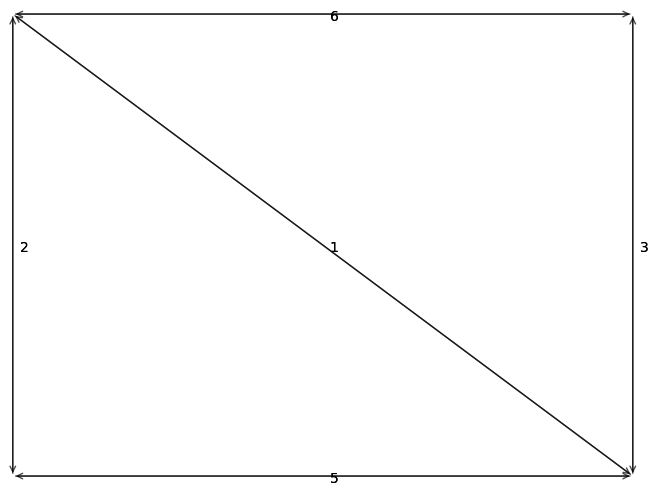

In [2]:
import matplotlib.pyplot as plt

# Fungsi untuk menggambar graf
def draw_graph(graph):
    plt.figure(figsize=(8, 6))
    plt.axis('off')

    for node in graph:
        for neighbor, weight in graph[node]:
            x1, y1 = node
            x2, y2 = neighbor
            plt.annotate("", xy=(x2, y2), xytext=(x1, y1),
                         arrowprops=dict(arrowstyle="->", alpha=0.7))
            plt.annotate(weight, xy=((x1+x2)/2, (y1+y2)/2),
                         xytext=(5, -5), textcoords='offset points')

    plt.show()

# Fungsi untuk menemukan lintasan terpendek dengan dynamic programming dan branch and bound
def shortest_path(graph, start, end):
    # Menyimpan jarak terpendek dari start ke setiap node
    shortest_distances = {node: float('inf') for node in graph}
    shortest_distances[start] = 0

    # Menyimpan lintasan terpendek dari start ke setiap node
    shortest_paths = {node: [] for node in graph}
    shortest_paths[start] = [start]

    # Menyimpan node yang telah dikunjungi
    visited = set()

    # Membuat antrian prioritas (priority queue) berdasarkan jarak
    queue = [(0, start)]

    while queue:
        # Mengambil node dengan jarak terpendek dari antrian
        distance, current_node = min(queue, key=lambda x: x[0])

        # Menghapus node dari antrian
        queue.remove((distance, current_node))

        # Menandai node sebagai dikunjungi
        visited.add(current_node)

        # Menghentikan iterasi jika mencapai node tujuan
        if current_node == end:
            break

        # Memeriksa semua tetangga dari node saat ini
        for neighbor, weight in graph[current_node]:
            if neighbor not in visited:
                # Menghitung jarak baru melalui node saat ini
                new_distance = distance + weight

                # Memeriksa apakah jarak baru lebih pendek dari jarak sebelumnya
                if new_distance < shortest_distances[neighbor]:
                    # Memperbarui jarak terpendek
                    shortest_distances[neighbor] = new_distance

                    # Memperbarui lintasan terpendek
                    shortest_paths[neighbor] = shortest_paths[current_node] + [neighbor]

                    # Menambahkan node tetangga ke antrian
                    queue.append((new_distance, neighbor))

    # Mengembalikan jarak terpendek dan lintasan terpendek
    return shortest_distances[end], shortest_paths[end]

# Contoh penggunaan
graph = {
    (0, 0): [((1, 0), 5), ((0, 1), 2)],
    (1, 0): [((0, 0), 5), ((0, 1), 1), ((1, 1), 3)],
    (0, 1): [((0, 0), 2), ((1, 0), 1), ((1, 1), 6)],
    (1, 1): [((1, 0), 3), ((0, 1), 6)]
}

start_node = (0, 0)
end_node = (1, 1)

shortest_distance, shortest_path = shortest_path(graph, start_node, end_node)

print(f"Jarak terpendek dari {start_node} ke {end_node}: {shortest_distance}")
print(f"Lintasan terpendek: {shortest_path}")

# Gambar graf
draw_graph(graph)
